          Target  Mean Squared Error (MSE)  R² Score
0     life_score                  0.000303  0.920924
1  science_score                  0.000081  0.969135
2   mining_score                  0.000231  0.922907
3  success_score                  0.000107  0.960916


C:\Users\oyunk\AppData\Local\Temp\ipykernel_21936\204267694.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean Squared Error (MSE)', y='Target', data=results_df, palette='coolwarm')
C:\Users\oyunk\AppData\Local\Temp\ipykernel_21936\204267694.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R² Score', y='Target', data=results_df, palette='viridis')


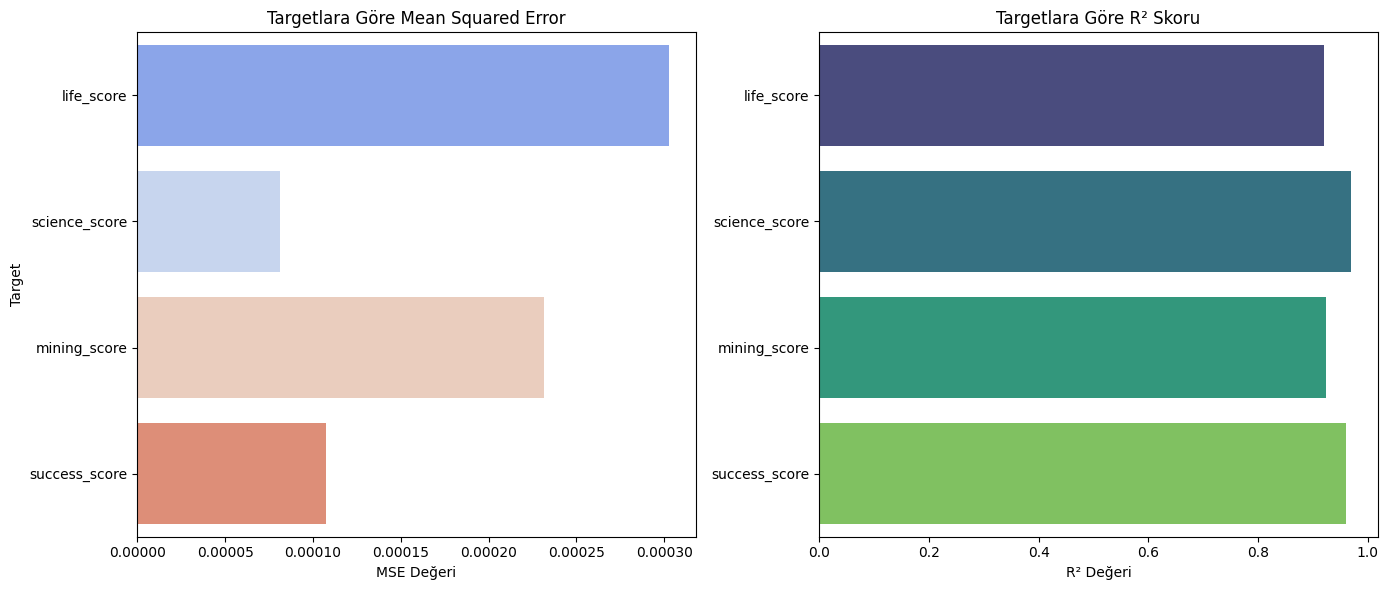

In [4]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Veri yükle
df = pd.read_csv("element_verileri.csv")

# 2. Elementler ve hedefler
elements = ['He', 'Ne', 'Cl', 'Mg', 'Ti', 'Fe', 'Ag', 'Ni', 'Si', 'Cu', 'Mn', 'Pt', 'U', 'Al', 'Ar', 'N', 'Zn', 'P', 'H', 'Ca', 'C', 'Cr', 'S', 'Li', 'Na', 'V']
targets = ['life_score', 'science_score', 'mining_score', 'success_score']

# 3. Özellikler
X = df[elements].copy()

# Özellik mühendisliği
X['average_density'] = X.mean(axis=1)
X['sum_density'] = X.sum(axis=1)
X['H_to_C_ratio'] = X['H'] / (X['C'] + 1e-6)
X['life_related_sum'] = X[['H', 'C', 'N', 'P', 'S']].sum(axis=1)
X['metal_sum'] = X[['Fe', 'Ni', 'Cu', 'Mn', 'Zn', 'Ag', 'Pt', 'Ti']].sum(axis=1)

# 4. Scaler yükle
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

X_scaled = scaler.transform(X)

# 5. Sonuçları tutacak liste
results = []

# 6. Her bir hedef için modeli yükle ve test et
for target in targets:
    # Modeli yükle
    with open(f'{target}_model.pkl', 'rb') as f:
        model = pickle.load(f)

    y_target = df[target]

    # Eğitim ve test verilerini ayır
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)

    # Tahmin yap
    y_pred = model.predict(X_test)

    # Performans metrikleri
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Sonuçları listeye ekle
    results.append({
        'Target': target,
        'Mean Squared Error (MSE)': mse,
        'R² Score': r2
    })

# 7. Sonuçları DataFrame olarak göster
results_df = pd.DataFrame(results)
print(results_df)

# 8. Grafikler
plt.figure(figsize=(14, 6))

# MSE grafiği
plt.subplot(1, 2, 1)
sns.barplot(x='Mean Squared Error (MSE)', y='Target', data=results_df, palette='coolwarm')
plt.title('Targetlara Göre Mean Squared Error')
plt.xlabel('MSE Değeri')
plt.ylabel('Target')

# R² grafiği
plt.subplot(1, 2, 2)
sns.barplot(x='R² Score', y='Target', data=results_df, palette='viridis')
plt.title('Targetlara Göre R² Skoru')
plt.xlabel('R² Değeri')
plt.ylabel('')

plt.tight_layout()
plt.show()